In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from sklearn.model_selection import TimeSeriesSplit
from numpy import sqrt
import datetime
from datetime import timedelta
import plotly.graph_objs as go
from tabulate import tabulate

/home/jonathan/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1.tail()

,ds,y
2923,2020-08-31 19:00:00,509.100
2924,2020-08-31 20:00:00,293.615
2925,2020-08-31 21:00:00,256.641
2926,2020-08-31 22:00:00,172.866
2927,2020-08-31 23:00:00,140.111


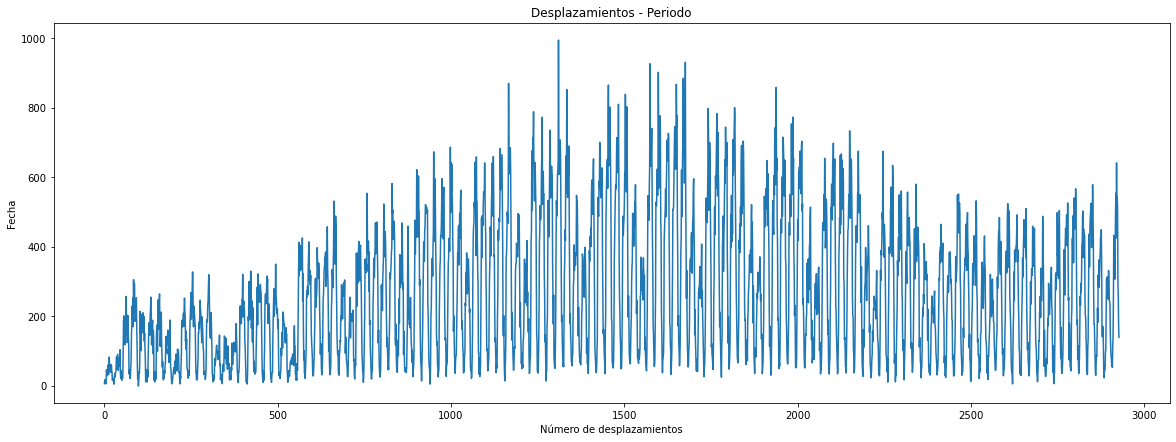

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, title='Desplazamientos - Periodo')
plt.xlabel('Número de desplazamientos')
plt.ylabel('Fecha')
plt.show()

# Dividimos el periodo 1 en 2 subconjuntos - Desescalada y Nueva normalidad
## Desescalada: 2 Mayo - 8 Junio

In [7]:
start_date = pd.Timestamp('2020-05-02')
end_date = pd.Timestamp('2020-06-08 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoDesescalada = Periodo1.loc[mask]

## Nueva normalidad: 9 Junio - 31 Agosto

In [8]:
start_date = pd.Timestamp('2020-06-09')
end_date = pd.Timestamp('2020-08-31 23:00:00')
mask = (Periodo1['ds'] >= start_date) & (Periodo1['ds'] <= end_date)
PeriodoNnormalidad = Periodo1.loc[mask]

In [9]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)

def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)

def est_Lunes1AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 1)

def est_Lunes2AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 2)

def est_Lunes3AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 3)

def est_Lunes4AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 4)

def est_Lunes5AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 5)

def est_Lunes6AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 6)

def est_Lunes7AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 7)

def est_Lunes8AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 8)

def est_Lunes9AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 9)

def est_Lunes10AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 10)

def est_Lunes11AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 11)

def est_Lunes12PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 12)

def est_Lunes13PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 13)

def est_Lunes14PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 14)

def est_Lunes15PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 15)

def est_Lunes16PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 16)

def est_Lunes17PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 17)

def est_Lunes18PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 18)

def est_Lunes19PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 19)

def est_Lunes20PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 20)

def est_Lunes21PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 21)

def est_Lunes22PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 22)

def est_Lunes23PM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 23)

def est_Lunes24AM(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0 and date.hour == 0)


##############################################Train########################################################

def Regressor1AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 1:                 
        mean = Train1AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor2AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 2:                 
        mean = Train2AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor3AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 3:                 
        mean = Train3AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor4AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 4:                 
        mean = Train4AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor5AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 5:                 
        mean = Train5AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor6AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 6:                 
        mean = Train6AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor7AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 7:                 
        mean = Train7AM_D.y.mean()
        valor = mean         
    else:
        valor = 0    
    return (valor)

def Regressor8AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 8:                 
        mean = Train8AM_D.y.mean()
        valor = mean                
    else:
        valor = 0    
    return (valor)

def Regressor9AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 9:                 
        mean = Train9AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor10AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 10:                 
        mean = Train10AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor11AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 11:                 
        mean = Train11AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor12PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 12:                 
        mean = Train12PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor13PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 13:                 
        mean = Train13PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor14PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 14:                 
        mean = Train14PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor15PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 15:                 
        mean = Train15PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor16PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 16:                 
        mean = Train16PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor17PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 17:                 
        mean = Train17PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor18PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 18:                 
        mean = Train18PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor19PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 19:                 
        mean = Train19PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor20PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 20:                 
        mean = Train20PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor21PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 21:                 
        mean = Train21PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor22PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 22:                 
        mean = Train22PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor23PMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 23:                 
        mean = Train23PM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)

def Regressor24AMTrain(ds):
    global fila    
    date = pd.to_datetime(ds)
    if date.dayofweek == 0 and date.hour == 0:                 
        mean = Train24AM_D.y.mean()
        valor = mean 
    else:
        valor = 0    
    return (valor)


PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)

PeriodoDesescalada['Lunes'] = PeriodoDesescalada['ds'].apply(est_Lunes)
PeriodoNnormalidad['Lunes'] = PeriodoNnormalidad['ds'].apply(est_Lunes)
PeriodoDesescalada['Viernes'] = PeriodoDesescalada['ds'].apply(est_Viernes)
PeriodoNnormalidad['Viernes'] = PeriodoNnormalidad['ds'].apply(est_Viernes)
 

PeriodoDesescalada['Lunes2AM'] = PeriodoDesescalada['ds'].apply(est_Lunes2AM)
PeriodoNnormalidad['Lunes2AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes2AM)

PeriodoDesescalada['Lunes3AM'] = PeriodoDesescalada['ds'].apply(est_Lunes3AM)
PeriodoNnormalidad['Lunes3AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes3AM)

PeriodoDesescalada['Lunes4AM'] = PeriodoDesescalada['ds'].apply(est_Lunes4AM)
PeriodoNnormalidad['Lunes4AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes4AM)

PeriodoDesescalada['Lunes5AM'] = PeriodoDesescalada['ds'].apply(est_Lunes5AM)
PeriodoNnormalidad['Lunes5AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes5AM)

PeriodoDesescalada['Lunes6AM'] = PeriodoDesescalada['ds'].apply(est_Lunes6AM)
PeriodoNnormalidad['Lunes6AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes6AM)

PeriodoDesescalada['Lunes7AM'] = PeriodoDesescalada['ds'].apply(est_Lunes7AM)
PeriodoNnormalidad['Lunes7AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes7AM)

PeriodoDesescalada['Lunes8AM'] = PeriodoDesescalada['ds'].apply(est_Lunes8AM)
PeriodoNnormalidad['Lunes8AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes8AM)

PeriodoDesescalada['Lunes9AM'] = PeriodoDesescalada['ds'].apply(est_Lunes9AM)
PeriodoNnormalidad['Lunes9AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes9AM)

PeriodoDesescalada['Lunes10AM'] = PeriodoDesescalada['ds'].apply(est_Lunes10AM)
PeriodoNnormalidad['Lunes10AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes10AM)

PeriodoDesescalada['Lunes11AM'] = PeriodoDesescalada['ds'].apply(est_Lunes11AM)
PeriodoNnormalidad['Lunes11AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes11AM)

PeriodoDesescalada['Lunes12PM'] = PeriodoDesescalada['ds'].apply(est_Lunes12PM)
PeriodoNnormalidad['Lunes12PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes12PM)

PeriodoDesescalada['Lunes13PM'] = PeriodoDesescalada['ds'].apply(est_Lunes13PM)
PeriodoNnormalidad['Lunes13PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes13PM)

PeriodoDesescalada['Lunes14PM'] = PeriodoDesescalada['ds'].apply(est_Lunes14PM)
PeriodoNnormalidad['Lunes14PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes14PM)

PeriodoDesescalada['Lunes15PM'] = PeriodoDesescalada['ds'].apply(est_Lunes15PM)
PeriodoNnormalidad['Lunes15PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes15PM)

PeriodoDesescalada['Lunes16PM'] = PeriodoDesescalada['ds'].apply(est_Lunes16PM)
PeriodoNnormalidad['Lunes16PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes16PM)

PeriodoDesescalada['Lunes17PM'] = PeriodoDesescalada['ds'].apply(est_Lunes17PM)
PeriodoNnormalidad['Lunes17PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes17PM)

PeriodoDesescalada['Lunes18PM'] = PeriodoDesescalada['ds'].apply(est_Lunes18PM)
PeriodoNnormalidad['Lunes18PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes18PM)

PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)

PeriodoDesescalada['Lunes20PM'] = PeriodoDesescalada['ds'].apply(est_Lunes20PM)
PeriodoNnormalidad['Lunes20PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes20PM)

PeriodoDesescalada['Lunes21PM'] = PeriodoDesescalada['ds'].apply(est_Lunes21PM)
PeriodoNnormalidad['Lunes21PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes21PM)

PeriodoDesescalada['Lunes22PM'] = PeriodoDesescalada['ds'].apply(est_Lunes22PM)
PeriodoNnormalidad['Lunes22PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes22PM)

PeriodoDesescalada['Lunes23PM'] = PeriodoDesescalada['ds'].apply(est_Lunes23PM)
PeriodoNnormalidad['Lunes23PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes23PM)

PeriodoDesescalada['Lunes24AM'] = PeriodoDesescalada['ds'].apply(est_Lunes24AM)
PeriodoNnormalidad['Lunes24AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes24AM)


/tmp/ipykernel_60433/918465150.py:349: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes1AM'] = PeriodoDesescalada['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_60433/918465150.py:350: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes1AM'] = PeriodoNnormalidad['ds'].apply(est_Lunes1AM)
/tmp/ipykernel_60433/918465150.py:352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_60433/918465150.py:409: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Lunes19PM'] = PeriodoDesescalada['ds'].apply(est_Lunes19PM)
/tmp/ipykernel_60433/918465150.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoNnormalidad['Lunes19PM'] = PeriodoNnormalidad['ds'].apply(est_Lunes19PM)
/tmp/ipykernel_60433/918465150.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

# IMPLEMENTACIÓN DE MODELO PROPHET
## Separamos el conjunto de datos de entrenamiento y prueba

In [10]:
# PeriodoDesescalada = PeriodoDesescalada.set_index('ds')
#PeriodoNnormalidad = PeriodoNnormalidad.set_index('ds')

In [11]:
# #Desescalada
# train_end_D = datetime.datetime(2020,6,7,23,0,0)
# test_end_D = datetime.datetime(2020,6,8,23,0,0)

# train_data_D = PeriodoDesescalada[:train_end_D]
# test_data_D = PeriodoDesescalada[train_end_D + timedelta(hours=1):test_end_D]

# #Nueva Normalidad
# train_end_N = datetime.datetime(2020,8,30,23,0,0)
# test_end_N = datetime.datetime(2020,8,31,23,0,0)
# # train_end_N = datetime.datetime(2020,8,23,23,0,0)
# # test_end_N = datetime.datetime(2020,8,24,23,0,0)
# # train_end_N = datetime.datetime(2020,8,16,23,0,0)
# # test_end_N = datetime.datetime(2020,8,17,23,0,0)

# train_data_N = PeriodoNnormalidad[:train_end_N]
# test_data_N = PeriodoNnormalidad[train_end_N + timedelta(hours=1):test_end_N]

In [12]:
# train_data_D = train_data_D.reset_index()
# train_data_N = train_data_N.reset_index()

# test_data_D = test_data_D.reset_index()
# test_data_N = test_data_N.reset_index()

# Ajustamos el periodo de Fourier-Horas con el periodo de datos entrenamiento


In [13]:
##################PeriodoNnormalidad######################
mask1AM_D = (PeriodoDesescalada['Lunes1AM'] == True)
mask2AM_D = (PeriodoDesescalada['Lunes2AM'] == True)
mask3AM_D = (PeriodoDesescalada['Lunes3AM'] == True)
mask4AM_D = (PeriodoDesescalada['Lunes4AM'] == True)
mask5AM_D = (PeriodoDesescalada['Lunes5AM'] == True)
mask6AM_D = (PeriodoDesescalada['Lunes6AM'] == True)
mask7AM_D = (PeriodoDesescalada['Lunes7AM'] == True)
mask8AM_D = (PeriodoDesescalada['Lunes8AM'] == True)
mask9AM_D = (PeriodoDesescalada['Lunes9AM'] == True)
mask10AM_D = (PeriodoDesescalada['Lunes10AM'] == True)
mask11AM_D = (PeriodoDesescalada['Lunes11AM'] == True)
mask12PM_D = (PeriodoDesescalada['Lunes12PM'] == True)
mask13PM_D = (PeriodoDesescalada['Lunes13PM'] == True)
mask14PM_D = (PeriodoDesescalada['Lunes14PM'] == True)
mask15PM_D = (PeriodoDesescalada['Lunes15PM'] == True)
mask16PM_D = (PeriodoDesescalada['Lunes16PM'] == True)
mask17PM_D = (PeriodoDesescalada['Lunes17PM'] == True)
mask18PM_D = (PeriodoDesescalada['Lunes18PM'] == True)
mask19PM_D = (PeriodoDesescalada['Lunes19PM'] == True)
mask20PM_D = (PeriodoDesescalada['Lunes20PM'] == True)
mask21PM_D = (PeriodoDesescalada['Lunes21PM'] == True)
mask22PM_D = (PeriodoDesescalada['Lunes22PM'] == True)
mask23PM_D = (PeriodoDesescalada['Lunes23PM'] == True)
mask24AM_D = (PeriodoDesescalada['Lunes24AM'] == True)

Train1AM_D = PeriodoDesescalada.loc[mask1AM_D]
Train2AM_D = PeriodoDesescalada.loc[mask2AM_D]
Train3AM_D = PeriodoDesescalada.loc[mask3AM_D]
Train4AM_D = PeriodoDesescalada.loc[mask4AM_D]
Train5AM_D = PeriodoDesescalada.loc[mask5AM_D]
Train6AM_D = PeriodoDesescalada.loc[mask6AM_D]
Train7AM_D = PeriodoDesescalada.loc[mask7AM_D]
Train8AM_D = PeriodoDesescalada.loc[mask8AM_D]
Train9AM_D = PeriodoDesescalada.loc[mask9AM_D]
Train10AM_D = PeriodoDesescalada.loc[mask10AM_D]
Train11AM_D = PeriodoDesescalada.loc[mask11AM_D]
Train12PM_D = PeriodoDesescalada.loc[mask12PM_D]
Train13PM_D = PeriodoDesescalada.loc[mask13PM_D]
Train14PM_D = PeriodoDesescalada.loc[mask14PM_D]
Train15PM_D = PeriodoDesescalada.loc[mask15PM_D]
Train16PM_D = PeriodoDesescalada.loc[mask16PM_D]
Train17PM_D = PeriodoDesescalada.loc[mask17PM_D]
Train18PM_D = PeriodoDesescalada.loc[mask18PM_D]
Train19PM_D = PeriodoDesescalada.loc[mask19PM_D]
Train20PM_D = PeriodoDesescalada.loc[mask20PM_D]
Train21PM_D = PeriodoDesescalada.loc[mask21PM_D]
Train22PM_D = PeriodoDesescalada.loc[mask22PM_D]
Train23PM_D = PeriodoDesescalada.loc[mask23PM_D]
Train24AM_D = PeriodoDesescalada.loc[mask24AM_D]

In [14]:
maskLunes = (PeriodoDesescalada['Lunes'] == True)
PatronLunes = PeriodoDesescalada.loc[maskLunes]
maskViernes = (PeriodoDesescalada['Viernes'] == True)
PatronViernes = PeriodoDesescalada.loc[maskViernes]

In [15]:
Train8AM_N = Train8AM_D.reset_index()
start8AM_N = Train8AM_D.iloc[0]['ds']
end8AM_N = Train8AM_D.iloc[-1]['ds'] 
N_Dias = pd.date_range(start8AM_N, end8AM_N, freq='D')
print(len(N_Dias))
print(N_Dias)

36
DatetimeIndex(['2020-05-04 08:00:00', '2020-05-05 08:00:00',
               '2020-05-06 08:00:00', '2020-05-07 08:00:00',
               '2020-05-08 08:00:00', '2020-05-09 08:00:00',
               '2020-05-10 08:00:00', '2020-05-11 08:00:00',
               '2020-05-12 08:00:00', '2020-05-13 08:00:00',
               '2020-05-14 08:00:00', '2020-05-15 08:00:00',
               '2020-05-16 08:00:00', '2020-05-17 08:00:00',
               '2020-05-18 08:00:00', '2020-05-19 08:00:00',
               '2020-05-20 08:00:00', '2020-05-21 08:00:00',
               '2020-05-22 08:00:00', '2020-05-23 08:00:00',
               '2020-05-24 08:00:00', '2020-05-25 08:00:00',
               '2020-05-26 08:00:00', '2020-05-27 08:00:00',
               '2020-05-28 08:00:00', '2020-05-29 08:00:00',
               '2020-05-30 08:00:00', '2020-05-31 08:00:00',
               '2020-06-01 08:00:00', '2020-06-02 08:00:00',
               '2020-06-03 08:00:00', '2020-06-04 08:00:00',
               '2020-

In [16]:
#Entrenamiento

PeriodoDesescalada['Patron1AM_D'] = PeriodoDesescalada['ds'].apply(Regressor1AMTrain)
PeriodoDesescalada['Patron2AM_D'] = PeriodoDesescalada['ds'].apply(Regressor2AMTrain)
PeriodoDesescalada['Patron3AM_D'] = PeriodoDesescalada['ds'].apply(Regressor3AMTrain)
PeriodoDesescalada['Patron4AM_D'] = PeriodoDesescalada['ds'].apply(Regressor4AMTrain)
PeriodoDesescalada['Patron5AM_D'] = PeriodoDesescalada['ds'].apply(Regressor5AMTrain)
PeriodoDesescalada['Patron6AM_D'] = PeriodoDesescalada['ds'].apply(Regressor6AMTrain)
PeriodoDesescalada['Patron7AM_D'] = PeriodoDesescalada['ds'].apply(Regressor7AMTrain)
PeriodoDesescalada['Patron8AM_D'] = PeriodoDesescalada['ds'].apply(Regressor8AMTrain)
PeriodoDesescalada['Patron9AM_D'] = PeriodoDesescalada['ds'].apply(Regressor9AMTrain)
PeriodoDesescalada['Patron10AM_D'] = PeriodoDesescalada['ds'].apply(Regressor10AMTrain)
PeriodoDesescalada['Patron11AM_D'] = PeriodoDesescalada['ds'].apply(Regressor11AMTrain)
PeriodoDesescalada['Patron12PM_D'] = PeriodoDesescalada['ds'].apply(Regressor12PMTrain)
PeriodoDesescalada['Patron13PM_D'] = PeriodoDesescalada['ds'].apply(Regressor13PMTrain)
PeriodoDesescalada['Patron14PM_D'] = PeriodoDesescalada['ds'].apply(Regressor14PMTrain)
PeriodoDesescalada['Patron15PM_D'] = PeriodoDesescalada['ds'].apply(Regressor15PMTrain)
PeriodoDesescalada['Patron16PM_D'] = PeriodoDesescalada['ds'].apply(Regressor16PMTrain)
PeriodoDesescalada['Patron17PM_D'] = PeriodoDesescalada['ds'].apply(Regressor17PMTrain)
PeriodoDesescalada['Patron18PM_D'] = PeriodoDesescalada['ds'].apply(Regressor18PMTrain)
PeriodoDesescalada['Patron19PM_D'] = PeriodoDesescalada['ds'].apply(Regressor19PMTrain)
PeriodoDesescalada['Patron20PM_D'] = PeriodoDesescalada['ds'].apply(Regressor20PMTrain)
PeriodoDesescalada['Patron21PM_D'] = PeriodoDesescalada['ds'].apply(Regressor21PMTrain)
PeriodoDesescalada['Patron22PM_D'] = PeriodoDesescalada['ds'].apply(Regressor22PMTrain)
PeriodoDesescalada['Patron23PM_D'] = PeriodoDesescalada['ds'].apply(Regressor23PMTrain)
PeriodoDesescalada['Patron24AM_D'] = PeriodoDesescalada['ds'].apply(Regressor24AMTrain)

#####################################Test#####################################
# test_data_N['Patron1AM_N'] = test_data_N['ds'].apply(Regressor1AMTrain)
# test_data_N['Patron2AM_N'] = test_data_N['ds'].apply(Regressor2AMTrain)
# test_data_N['Patron3AM_N'] = test_data_N['ds'].apply(Regressor3AMTrain)
# test_data_N['Patron4AM_N'] = test_data_N['ds'].apply(Regressor4AMTrain)
# test_data_N['Patron5AM_N'] = test_data_N['ds'].apply(Regressor5AMTrain)
# test_data_N['Patron6AM_N'] = test_data_N['ds'].apply(Regressor6AMTrain)
# test_data_N['Patron7AM_N'] = test_data_N['ds'].apply(Regressor7AMTrain)
# test_data_N['Patron8AM_N'] = test_data_N['ds'].apply(Regressor8AMTrain)
# test_data_N['Patron9AM_N'] = test_data_N['ds'].apply(Regressor9AMTrain)
# test_data_N['Patron10AM_N'] = test_data_N['ds'].apply(Regressor10AMTrain)
# test_data_N['Patron11AM_N'] = test_data_N['ds'].apply(Regressor11AMTrain)
# test_data_N['Patron12PM_N'] = test_data_N['ds'].apply(Regressor12PMTrain)
# test_data_N['Patron13PM_N'] = test_data_N['ds'].apply(Regressor13PMTrain)
# test_data_N['Patron14PM_N'] = test_data_N['ds'].apply(Regressor14PMTrain)
# test_data_N['Patron15PM_N'] = test_data_N['ds'].apply(Regressor15PMTrain)
# test_data_N['Patron16PM_N'] = test_data_N['ds'].apply(Regressor16PMTrain)
# test_data_N['Patron17PM_N'] = test_data_N['ds'].apply(Regressor17PMTrain)
# test_data_N['Patron18PM_N'] = test_data_N['ds'].apply(Regressor18PMTrain)
# test_data_N['Patron19PM_N'] = test_data_N['ds'].apply(Regressor19PMTrain)
# test_data_N['Patron20PM_N'] = test_data_N['ds'].apply(Regressor20PMTrain)
# test_data_N['Patron21PM_N'] = test_data_N['ds'].apply(Regressor21PMTrain)
# test_data_N['Patron22PM_N'] = test_data_N['ds'].apply(Regressor22PMTrain)
# test_data_N['Patron23PM_N'] = test_data_N['ds'].apply(Regressor23PMTrain)
# test_data_N['Patron24AM_N'] = test_data_N['ds'].apply(Regressor24AMTrain)

/tmp/ipykernel_60433/488079701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Patron1AM_D'] = PeriodoDesescalada['ds'].apply(Regressor1AMTrain)
/tmp/ipykernel_60433/488079701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PeriodoDesescalada['Patron2AM_D'] = PeriodoDesescalada['ds'].apply(Regressor2AMTrain)
/tmp/ipykernel_60433/488079701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [17]:
#train_data_D.iloc[56:59]
#test_data_D.head(50)
#test_data_D.ds.iloc[0]
#Train8AM_D

# Desescalada
## Aplicamos Rolling Forecasting para evaluación del modelo
## Agregamos Regressor

In [18]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='Lunes_season', period=1, fourier_order=5, condition_name='Lunes')                
m.add_regressor('Patron1AM_D',mode='multiplicative')        
m.add_regressor('Patron2AM_D',mode='multiplicative')        
m.add_regressor('Patron3AM_D',mode='multiplicative')        
m.add_regressor('Patron4AM_D',mode='multiplicative')        
m.add_regressor('Patron5AM_D',mode='multiplicative')        
m.add_regressor('Patron6AM_D',mode='multiplicative')        
m.add_regressor('Patron7AM_D',mode='multiplicative')        
m.add_regressor('Patron8AM_D',mode='multiplicative')        
m.add_regressor('Patron9AM_D',mode='multiplicative')        
m.add_regressor('Patron10AM_D',mode='multiplicative')        
m.add_regressor('Patron11AM_D',mode='multiplicative')        
m.add_regressor('Patron12PM_D',mode='multiplicative')        
m.add_regressor('Patron13PM_D',mode='multiplicative')        
m.add_regressor('Patron14PM_D',mode='multiplicative')        
m.add_regressor('Patron15PM_D',mode='multiplicative')        
m.add_regressor('Patron16PM_D',mode='multiplicative')        
m.add_regressor('Patron17PM_D',mode='multiplicative')        
m.add_regressor('Patron18PM_D',mode='multiplicative')        
m.add_regressor('Patron19PM_D',mode='multiplicative')        
m.add_regressor('Patron20PM_D',mode='multiplicative')        
m.add_regressor('Patron21PM_D',mode='multiplicative')        
m.add_regressor('Patron22PM_D',mode='multiplicative')        
m.add_regressor('Patron23PM_D',mode='multiplicative')        
m.add_regressor('Patron24AM_D',mode='multiplicative')
m.fit(PeriodoDesescalada);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.3929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1865.62   1.80252e-05       86.7947           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       1865.93   0.000209725       83.9469   2.537e-06       0.001      211  LS failed, Hessian reset 
     195       1866.19   2.56234e-05       97.5667   3.586e-07       0.001      314  LS failed, Hessian reset 
     199       1866.19   1.05411e-05       74.3676           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1866.19   2.96782e-08       84.8324      0.0581           1      400   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


# Cross Validation

In [24]:
def getPerfomanceMetrics(m):
    return performance_metrics(getCrossValidationData(m),rolling_window=0)
def getCrossValidationData(m):
    cutoffs = pd.to_datetime(['2020-06-08 19:00:00'])
    return cross_validation(m, cutoffs=cutoffs,horizon='1 hours')    

In [25]:
df_p = getPerfomanceMetrics(m)#.mean()

  0%|          | 0/1 [00:00<?, ?it/s]

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1854.13     0.0125578       104.095           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1857.45   4.60779e-05       87.5662      0.4773      0.4773      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       1857.66   0.000308156       109.714   2.842e-06       0.001      330  LS failed, Hessian reset 
     299       1857.78   0.000167718        94.459      0.9433      0.9433      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       1858.85   0.000390193       119.901   1.858e-06       0.001      551  LS failed, Hessian reset 
     399       1858.86   0.000122803       93.7272           1           1      552   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [26]:
df_p.head(50)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 01:00:00,12593.513271,112.220824,112.220824,0.223582,0.223582,0.251722,0.0


In [23]:
import itertools
param_grid = {  
    'fecha': ['2020-05-25','2020-06-01','2020-06-08'],
    'hora': ['00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00','07:00:00','08:00:00',
             '09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00','15:00:00','16:00:00','17:00:00',
             '18:00:00','19:00:00','20:00:00','21:00:00','22:00:00'],
}

# Generate all combinations of parameters
cont = 0
for fecha in param_grid['fecha']:    
    if cont==0:
        Fechas = pd.date_range(start=fecha, periods=24, freq='H')
    else:
        Fecha_Range = pd.date_range(start=fecha, periods=24, freq='H')
        Fechas = Fechas.append(Fecha_Range)
    cont += 1

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here
MAPEs = []  # Store the MAPEs for each params here
cutoff24_1 = {'fecha': '2020-05-24', 'hora': '23:00:00'}
cutoff24_2 = {'fecha': '2020-05-31', 'hora': '23:00:00'}
cutoff24_3 = {'fecha': '2020-06-07', 'hora': '23:00:00'}

all_params.insert(0, cutoff24_1)
all_params.insert(24, cutoff24_2)
all_params.insert(48, cutoff24_3)
# # Use cross validation to evaluate all parameters
for params in all_params:
    cutoff = params['fecha'] + ' ' + params['hora']
    cutoffs = pd.to_datetime([cutoff])
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='1 hours', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=0)    
    rmses.append(df_p['rmse'].values[0])
    MAPEs.append(df_p['mape'].values[0])

# # # Find the best parameters
tuning_results = pd.DataFrame(Fechas)
tuning_results['rmse'] = rmses
tuning_results['MAPE'] = MAPEs
print(tuning_results)

INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d92f6d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.2898
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        943.37   0.000968715       93.8919      0.5357      0.5357      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       943.554   6.05967e-05       60.4509    1.09e-06       0.001      279  LS failed, Hessian reset 
     199       943.559   7.81391e-05        70.212           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       943.708   0.000147221       103.008      0.3305      0.3305      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     369         943.8   1.78232e-05       69.6682   2.619e-07       0.001      530  LS failed, Hessian reset 
     399       943.808   2.04041e-06       69.5709       0.269           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     411       943.809   6.05353e-06       98.1061   7.538e-08       0.001      633  LS failed, Hessian reset 
     429       943.809    2.3397e-08        71.025      0.2946      0.2946      659   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7670>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -39.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      63       945.562   0.000294512       85.3084   3.664e-06       0.001      111  LS failed, Hessian reset 
      99       945.576   3.54744e-06       84.4242      0.8567      0.8567      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183        945.63   5.85877e-05        84.272   7.101e-07       0.001      312  LS failed, Hessian reset 
     199       945.659    0.00019267       82.8837           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       945.667   2.06848e-05       80.8753   2.738e-07       0.001      407  LS failed, Hessian reset 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       945.669   1.24452e-07       64.9584       0.621       0.621      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       945.669   6.04894e-08       79.8937      0.4183           1      494   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80ef70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.0175
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      71       947.771   7.56789e-05       78.8483   9.913e-07       0.001      122  LS failed, Hessian reset 
      99       947.781   5.25211e-05       63.8011       0.707      0.0707      159   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       947.815   8.08276e-06       83.8974       0.207           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     252       947.817   4.01926e-08       81.1482      0.5575      0.5575      360   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfaf0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.5859
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       949.755   6.22981e-05       76.9239      0.6238      0.6238      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       949.818   2.53831e-05       73.9588      0.4026           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       950.026   0.000145116       86.3827      0.6359      0.6359      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       950.173   0.000519434       101.958       0.614       0.614      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       950.928   0.000727081       79.4872      0.4142      0.4142      592   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     698        951.09   6.05849e-07        71.726   6.781e-09       0.001      974  LS failed, Hessian reset 
     699        951.09   1.49588e-07       62.9533       0.773       0.773      975   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     710        951.09   4.79365e-08       72.2579           1           1      990   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80ebe0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.8505
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       951.989   2.06243e-05       81.4807   1.962e-07       0.001      149  LS failed, Hessian reset 
      99       951.989   1.81795e-07       69.4894      0.1655      0.1655      165   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119        951.99   5.39096e-08        72.582      0.3772           1      191   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfe80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.5799
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      95       953.572   0.000185951       89.0659   2.384e-06       0.001      161  LS failed, Hessian reset 
      99       953.578   8.48126e-06       62.3436      0.2921      0.2921      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       953.677   4.29331e-05       59.2182      0.3715           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       953.881   0.000802076       78.7681      0.6376      0.6376      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       953.974   0.000163868       56.9301     1.9e-06       0.001      472  LS failed, Hessian reset 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       954.052   2.37675e-06       84.5832      0.3315      0.3315      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     441       954.055   3.72568e-09       56.7486    0.007902      0.7971      634   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fda90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.4908
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       955.898    0.00107373        78.852      0.5505      0.5505      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       956.018   6.05637e-05       81.4202           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       956.055   0.000431359       73.5392   4.965e-06       0.001      333  LS failed, Hessian reset 
     299       956.134   4.70938e-05       61.1886      0.3317           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       956.137   7.24299e-08       70.9344      0.4039           1      479   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cffa0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.0627
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       957.834    0.00025853       68.0513      0.3551      0.3551      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       958.019   0.000622133       68.8517   6.356e-06       0.001      186  LS failed, Hessian reset 
     199       958.089    7.4602e-06       87.0538      0.1933           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       958.107   6.05144e-06       78.8498           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       958.197   9.57409e-06       76.0617           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       958.212   2.62349e-05       87.2641           1           1      642   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     501       958.212   4.74351e-06       52.4102   5.554e-08       0.001      679  LS failed, Hessian reset 
     520       958.212   2.35183e-08       54.6302      0.3834      0.3834      704   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80a3a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.1345
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       958.551   1.63161e-05       80.3441    0.008226           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       960.199   2.59673e-05       67.2272      0.6828      0.6828      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       960.291   6.17302e-06       77.0918           1           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       960.293   1.54904e-07       75.5796       0.979       0.979      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     401       960.293   4.11851e-08       66.3466       0.272           1      508   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80e3a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.0522
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99         959.1    0.00210424       90.2013           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       960.157   3.72961e-05       83.4868      0.2983           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       960.848    0.00186428       85.5954    1.89e-05       0.001      337  LS failed, Hessian reset 
     299       960.989   0.000209034       82.0759      0.7904      0.7904      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       961.098   4.81461e-06       74.9253      0.7919      0.7919      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     445       961.128   0.000152642       91.7341   1.849e-06       0.001      611  LS failed, Hessian reset 
     499       961.194   7.79953e-07       60.4952      0.2743      0.2743      682   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     558       961.196   1.72665e-07       71.7375   2.508e-09       0.001      798  LS failed, Hessian reset 
     560       961.196   4.81748e-08       67.1442      0.3244           1      801   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7d00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.8783
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1042.88     0.0045062       108.281           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1045.18   0.000966101       67.6456      0.3455           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       1045.45   0.000188905       88.0476   2.389e-06       0.001      338  LS failed, Hessian reset 
     299        1045.5   0.000324201       93.0342       0.622       0.622      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1045.63   4.17079e-05       94.0765      0.3809           1      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     426       1045.66   4.20631e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cff70>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.9224
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       1045.48    0.00175148       102.448   2.128e-05       0.001      139  LS failed, Hessian reset 
      99       1045.61   0.000608893       69.3048      0.3686           1      147   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1045.94     0.0001731       79.9028           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       1046.11   0.000676385       94.4737   6.889e-06       0.001      328  LS failed, Hessian reset 
     299       1046.29   0.000118229       89.2627           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     365       1046.66    0.00164075        114.61   1.424e-05       0.001      562  LS failed, Hessian reset 
     399       1047.18   7.16048e-05       81.5144      0.4427      0.4427      600   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     491       1047.23    5.0263e-08        85.372      0.7055      0.7055      724   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d92fc40>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.4967
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1043.07   0.000452337       125.502      0.5289      0.5289      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       1043.27   5.57921e-05       78.5746   9.249e-07       0.001      208  LS failed, Hessian reset 
     199       1043.58   0.000569276       88.0602      0.7297      0.7297      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       1043.64   0.000399667       79.1153   4.491e-06       0.001      332  LS failed, Hessian reset 
     299       1043.92   2.46692e-05       86.6213       0.405       0.405      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     325       1044.75    0.00128641       117.804   1.178e-05       0.001      509  LS failed, Hessian reset 
     390       1045.23   2.91745e-05       87.4102   3.222e-07       0.001      627  LS failed, Hessian reset 
     399       1045.23   2.44549e-06       63.5469      0.7831      0.7831      637   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1045.3   2.62539e-06       79.9872      0.5601      0.5601      767   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     559       1045.31   2.25473e-08       79.0614      0.3474           1      845   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fdb80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.866
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1045.52    0.00372113       101.403           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       1046.54    0.00156478       153.184   1.921e-05       0.001      248  LS failed, Hessian reset 
     199       1046.95   0.000914036       76.5768           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1047.14    2.1291e-05       73.7715      0.1897           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       1047.24      0.000531       106.615   5.016e-06       0.001      497  LS failed, Hessian reset 
     399       1047.31   7.35232e-06       74.2761           1           1      556   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     734       1048.93   6.30973e-06       95.2005   7.592e-08       0.001     1020  LS failed, Hessian reset 
     799       1048.95   2.63954e-06       81.1938      0.7038      0.7038     1095   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     844       1048.96   9.93126e-08       68.4424      0.1591      0.3875     1153   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80e220>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.1794
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1044.42   0.000822872       77.7714      0.2453           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1046.71    0.00117471       85.3967      0.3596           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1046.92   0.000179836       82.9316           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       1048.61    0.00165749       108.856   1.499e-05       0.001      485  LS failed, Hessian reset 
     399       1048.97    0.00012303       73.5749      0.3868      0.3868      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1049.25   0.000473723    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d92fc40>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -37.8971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1046.4     0.0026085       77.8668      0.7128      0.7128      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1048.82    0.00183072        103.24           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1049.06   0.000104149       97.0276      0.7362      0.7362      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1049.19    8.7356e-06       100.342      0.3479           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1049.26   0.000266821       82.4801      0.6249      0.6249      596   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     737       1051.16   8.70869e-06        97.244   9.168e-08       0.001      988  LS failed, Hessian reset 
     766       1051.16   9.82659e-08       77.0538      0.9174      0.9174     1020   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf940>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.6111
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1048.72   0.000996058        87.772      0.9604      0.9604      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1050.49   0.000713873       79.0794   9.238e-06       0.001      201  LS failed, Hessian reset 
     199          1051   0.000504927       86.2119      0.5827      0.5827      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1051.47   0.000298549       95.4411           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1053.49   0.000563651       74.1124     0.04087           1      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1053.62   5.90495e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80e790>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.9349
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1049.15    0.00425029       89.2499      0.1526           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       1050.53    0.00151241       88.4587   2.135e-05       0.001      226  LS failed, Hessian reset 
     199       1051.58   0.000315587       81.3912           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1052.14    0.00218242       84.8002      0.8355      0.8355      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       1053.37    0.00114796       135.272   1.059e-05       0.001      493  LS failed, Hessian reset 
     399       1054.08   0.000451616       84.6526      0.4827      0.4827      574   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     694       1054.37   1.18494e-05       79.9982   1.285e-07       0.001      967  LS failed, Hessian reset 
     699       1054.37   1.06352e-06       68.5754      0.2313      0.2313      976   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     799        1054.4   4.76767e-06       87.8355           1           1     1090   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     826        1054.4   1.20215e-07       87.1358           1           1     1127   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf580>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.9699
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1052.13    0.00398196       80.1361           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144       1053.26   0.000735521       84.0296   7.284e-06       0.001      197  LS failed, Hessian reset 
     199        1053.8    0.00474835       129.163           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1054.37   5.73005e-05       80.2807      0.3133      0.8155      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1055.02     0.0078008       82.7524           1           1      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     410       1055.63    0.00148999    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     799       1057.28   3.45705e-06       69.7421      0.4045           1     1016   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     833       1057.28   2.76885e-08       84.3958     0.05911           1     1056   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd220>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.6668
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1053.23    0.00531759        93.205           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1055.68     0.0003937       86.5055           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286       1057.63    0.00108028       124.517   7.517e-06       0.001      377  LS failed, Hessian reset 
     299       1057.91   0.000542772       73.6706           1           1      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       1058.04   1.19343e-06       83.3284           1           1      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     495       1058.05   1.94195e-08       70.9192      0.3347      0.3347      632   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80e0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.7499
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1068.7    0.00159233        142.98      0.7266      0.7266      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1072.61    0.00320997       87.4019           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1075.82   0.000115392       85.1171      0.1713      0.1713      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     335       1075.99   0.000132642       92.9525   1.384e-06       0.001      460  LS failed, Hessian reset 
     399       1076.03   2.72022e-05       65.4671           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1076.05   4.89134e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fdbb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.654
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          1073    0.00468992       167.889      0.5106      0.5106      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136        1074.3    0.00118854       92.7713   1.407e-05       0.001      200  LS failed, Hessian reset 
     197       1074.61   0.000109532       84.0728   1.616e-06       0.001      306  LS failed, Hessian reset 
     199       1074.61   7.04602e-05       75.6717           1           1      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1074.74   0.000731907        77.712           1           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       1075.28    0.00342616        241.82   3.114e-05       0.001      479  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     999       1077.05   4.70102e-05       84.2389   5.527e-07       0.001     1452  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1099       1077.06   3.47199e-05        70.543           1           1     1572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1167       1077.06   1.45675e-07       84.2399     0.06425           1     1660   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d713b50>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.6768
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1073.15    0.00990517       78.1079           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1077.4    0.00290375       91.7686           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1078.8   0.000360676       95.1629           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       1079.03   9.97591e-06         84.24           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     412       1079.03   6.89967e-06       83.9069   6.848e-08       0.001      524  LS failed, Hessian reset 
     436       1079.03   9.60283e-08       80.1595           1           1      556   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d99a250>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.0491
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1077.45    0.00890022       88.5762      0.4446           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     128       1078.38   0.000916221       71.1913   1.259e-05       0.001      187  LS failed, Hessian reset 
     199       1078.97    0.00072005       78.3968      0.8133      0.8133      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1079.9   4.45758e-05       90.3433      0.5227      0.5227      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     399       1079.99   7.42929e-06        86.041           1           1      510   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     451       1079.99   7.19495e-06       83.6957   7.894e-08       0.001      614  LS failed, Hessian reset 
     496       1079.99   6.35662e-08        70.243      0.3043           1      671   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d234ee0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.2462
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1434.99   0.000301928        86.166           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       1435.71   3.79408e-08       83.0784      0.5161      0.5161      236   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.5408
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1437.44   0.000861844       106.744           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     156       1438.15   2.71081e-05       76.0748   3.531e-07       0.001      228  LS failed, Hessian reset 
     199       1438.18   2.31876e-07       72.2175      0.4452      0.4452      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       1438.18   4.50656e-08       95.0128      0.3965           1      345   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fdee0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.5452
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1440.09   2.30894e-05       84.5449        0.76        0.76      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1440.56   5.51011e-05       99.3189      0.5355      0.5355      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1440.62   8.97018e-05       89.3925           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       1440.63   3.65505e-08       79.4708      0.3799           1      464   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf850>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.7559
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       1442.43    0.00105301       202.545   1.078e-05       0.001      114  LS failed, Hessian reset 
      99       1442.72    4.9435e-06       79.9779      0.3807      0.3807      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1442.76   0.000261409        92.811        0.49        0.49      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       1442.98   8.27535e-05       82.8462   9.381e-07       0.001      408  LS failed, Hessian reset 
     299       1443.07   6.95832e-05       81.5712           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       1443.08   9.40318e-06       95.1984   9.788e-08       0.001      591  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d234ee0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -31.1987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1445.13    0.00334612       83.7079      0.8415      0.8415      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       1445.44   0.000493196       143.517   4.518e-06       0.001      183  LS failed, Hessian reset 
     199       1445.57   3.62148e-05       84.2898           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     287       1445.65   1.10413e-07       89.2627      0.2999      0.2999      394   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf8e0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.4626
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1447.55   0.000206117        72.847          10           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1447.94   0.000631161       106.088   7.082e-06       0.001      220  LS failed, Hessian reset 
     199       1448.06   4.43487e-05         87.83           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1448.09   1.20488e-06       83.8902           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       1448.09   2.30034e-08       79.9064      0.1632           1      505   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80e700>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9983
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1450.04   1.67006e-05       88.9512      0.4954      0.4954      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1450.45   6.81666e-05       79.6327           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1450.49   5.31228e-05       80.8764      0.3077      0.3077      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361        1450.5   2.47543e-08       66.1312      0.1476           1      464   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d99a280>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1451.78    0.00177961       97.5519      0.6495      0.6495      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1452.1   1.09264e-06        83.729           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1452.53   0.000684844       93.2201   6.957e-06       0.001      411  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1452.79   0.000580253       86.1384      0.7909      0.7909      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1452.89   8.58009e-05       76.4475           1           1      649   
    Iter      log prob        ||dx||     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7340>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.8275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1451.82   0.000119109       76.2901      0.2784      0.2784      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1453.14   0.000694479       89.1767           1           1      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1453.34   3.17231e-05       73.8571           1           1      348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1454.19    0.00413714       93.1209     0.06309           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     402       1454.24    0.00096523       101.695   1.008e-05       0.001      512  LS failed, Hessian reset 
     499       1454.84   7.96361e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d92f850>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.8386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1451.81   0.000494749       90.0087      0.4109      0.4109      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       1452.78   0.000447675       82.5951   5.721e-06       0.001      248  LS failed, Hessian reset 
     199       1452.91   0.000102277        79.365       0.639       0.639      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1453.02   1.02955e-05       72.2343           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       1453.03    2.1962e-05       92.9507   2.387e-07       0.001      472  LS failed, Hessian reset 
     363       1453.03   8.07675e-08       79.2906           1           1      518   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfc10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.6643
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1453.37    0.00365772       91.1187           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117        1453.9    0.00121363       137.546   1.138e-05       0.001      191  LS failed, Hessian reset 
     199       1454.61    0.00330401       98.0326      0.1629           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1454.64   0.000266063       98.3034    2.33e-06       0.001      339  LS failed, Hessian reset 
     299       1454.81    2.6946e-05       89.8712       0.241           1      464   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1456.32   0.000172841       75.0381           1           1      578   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     467       1456.35   4.01595e-05       80.5741    5.38e-07       0.001      709  LS failed, Hessian reset 
     499       1456.35   4.65774e-07       73.5379      0.5078      0.5078      754   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     538       1456.35   3.76384e-08       79.3413      0.1486      0.1486      804   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7220>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.1053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1456.63    0.00936376       158.871       0.457       0.457      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1457.24   0.000254667       98.3608   3.131e-06       0.001      246  LS failed, Hessian reset 
     199        1457.4   7.70053e-05       89.0526           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1457.48   0.000330068       98.3981      0.4472           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387       1458.59     6.247e-05       90.8919   8.158e-07       0.001      560  LS failed, Hessian reset 
     399        1458.6   2.50974e-05       78.5308           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438        1458.6   1.74457e-07       80.0163      0.2453      0.6099      632   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd100>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.7044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1458.17   0.000678698         94.77       1.563      0.1563      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       1458.67   0.000687619       161.408   6.414e-06       0.001      198  LS failed, Hessian reset 
     199        1459.1    0.00126273       92.7109           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     228       1459.27    0.00131503       102.854   1.146e-05       0.001      343  LS failed, Hessian reset 
     299       1459.55   0.000193453       73.9366      0.8811      0.8811      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       1459.57   1.25016e-06        77.355   1.652e-08       0.001      525  LS failed, Hessian reset 
     359       1459.57   4.99068e-08       88.8559      0.5266      0.5266      544   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7a60>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.2252
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1460.38    0.00349054       93.7629           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1460.83   0.000443718       101.823   5.535e-06       0.001      181  LS failed, Hessian reset 
     175       1461.34   0.000383709       88.7114   4.713e-06       0.001      290  LS failed, Hessian reset 
     199       1461.44   0.000143221       91.4436           1           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        1461.6   7.35145e-05       85.3624      0.8237      0.8237      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1461.68   0.000392495       84.5893       1.939      0.4385      565   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     456       1462.41    0.00222216       276.043    2.12e-05       0.001      679  LS failed, Hessian reset 
     499       1462.71   0.000239495       87.9751      0.2948           1      731   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599       1462.77   3.22208e-05       86.3637      0.5576           1      852   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     637       1462.77   2.05945e-08       72.7228      0.3166      0.3166      902   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d99ad00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.366
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1462.17   0.000225664        74.675      0.6264      0.6264      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140        1463.3    0.00107335       179.065   1.146e-05       0.001      215  LS failed, Hessian reset 
     171       1463.68   9.21866e-05       85.2378   1.051e-06       0.001      291  LS failed, Hessian reset 
     199       1463.69   1.71153e-06       91.2948     0.04237     0.04237      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     278       1463.72   5.55961e-07       91.4599   6.528e-09       0.001      467  LS failed, Hessian reset 
     290       1463.72   4.26299e-08        83.613      0.5919      0.5919      481   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfe20>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9984
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1463.35    0.00422675       83.0829      0.8566      0.8566      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1465.58    0.00352882       214.351           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       1466.03   0.000128906       85.2182   1.787e-06       0.001      352  LS failed, Hessian reset 
     299       1466.05   1.16375e-06       89.1886      0.5865      0.5865      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1466.16    0.00114954       81.8894           1           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     427       1467.19     0.0031679    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     799       1467.93   6.25275e-06       88.6867      0.5358           1     1094   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     885       1467.95   6.59421e-08       79.4616     0.06143           1     1196   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d99a3a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.6165
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1466.52    0.00456058       132.376       0.863       0.863      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       1467.99   0.000440375       122.142   4.224e-06       0.001      226  LS failed, Hessian reset 
     199       1468.39   5.14571e-05        78.411      0.5763      0.5763      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1468.57    0.00125842        85.861       2.141      0.2141      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1469.03   0.000257898       76.1829      0.6839      0.6839      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     471       1469.72    0.00254026    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     599       1469.93   5.89345e-06       68.0348      0.3874      0.3874      802   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     694       1469.95   1.36287e-05       86.0846   1.423e-07       0.001      965  LS failed, Hessian reset 
     699       1469.95   1.71984e-06       80.3374       0.356       0.356      971   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     726       1469.95   2.96524e-08       81.7404      0.3458           1     1006   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfa90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.5379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1469.95    0.00232794       115.424           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       1470.39    0.00098658       186.822   9.364e-06       0.001      184  LS failed, Hessian reset 
     139        1470.7   0.000224176       77.6568   2.785e-06       0.001      249  LS failed, Hessian reset 
     199       1470.72   2.03735e-05       88.4606           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     296       1470.85   0.000167005       80.9135   1.837e-06       0.001      499  LS failed, Hessian reset 
     299       1470.86   5.47978e-05       71.1951           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fdbb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.7375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1471.38   0.000371596       78.6632      0.6915      0.6915      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1472.37    0.00228544       241.298    2.13e-05       0.001      219  LS failed, Hessian reset 
     185       1472.57   0.000126431       79.7168   1.458e-06       0.001      313  LS failed, Hessian reset 
     199       1472.57   3.44631e-06       68.1781      0.2415           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     217       1472.57   8.02317e-08        72.406           1           1      353   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d80ebe0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.3969
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1472.67    0.00129959       81.3988           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175        1473.9   0.000397132       95.7536   3.656e-06       0.001      258  LS failed, Hessian reset 
     199       1473.95   7.80129e-06       77.1538      0.2745           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     221       1473.95    1.1973e-05       83.0173   1.301e-07       0.001      349  LS failed, Hessian reset 
     246       1473.95   2.30503e-08       78.6283      0.2913      0.2913      386   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d73d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.047
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1474.88    0.00117444       86.3901           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       1475.67   0.000393595       89.9876   4.374e-06       0.001      251  LS failed, Hessian reset 
     199       1475.86   3.47128e-05       64.1979      0.8796      0.8796      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     265       1476.14   0.000548437       116.221   6.007e-06       0.001      395  LS failed, Hessian reset 
     299       1476.32   0.000120842       79.6327           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       1476.33    3.2617e-06       69.6573   3.803e-08       0.001      549  LS failed, Hessian reset 
     370       1476.33    3.4392e-08       70.5824      0.2437      0.2437      565   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd790>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.3025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1477.57    0.00224596       115.191           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       1478.67     0.0013511       99.8471   1.743e-05       0.001      220  LS failed, Hessian reset 
     199       1478.84   6.73606e-05       90.2402           1           1      265   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1478.94   0.000106879       74.0463      0.3383      0.3383      378   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       1479.08   0.000326615       95.3784   3.933e-06       0.001      449  LS failed, Hessian reset 
     388       1479.15   1.84004e-06       79.1371     2.1e-08       0.001      565  LS failed, Hessian reset 
     399       1479.15   5.94395e-08       69.3817           1           1      580   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       1479.15   1.08606e-07       84.0112      0.2831           1      598   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfcd0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -16.6104
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1481.21   0.000316285       74.9958       1.686           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       1481.39   0.000628841       91.3464   6.834e-06       0.001      233  LS failed, Hessian reset 
     199       1481.51   0.000398123       84.9188      0.1763           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1481.79   0.000428761       74.6838      0.2464      0.2464      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       1482.57   0.000424681       104.881   4.846e-06       0.001      493  LS failed, Hessian reset 
     399       1482.75   3.13525e-05       100.055           1           1      554   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     464       1482.76   8.23722e-08       81.6294      0.3651      0.3651      635   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7136a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.1337
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       1483.77    0.00180002       122.305   2.037e-05       0.001      140  LS failed, Hessian reset 
      99        1483.9   0.000507629       84.8036           1           1      149   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1484.29   0.000130625       75.8942      0.4975      0.4975      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1484.49   0.000248392       86.1416       0.427       0.427      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1484.66   3.44748e-06       80.3813      0.3771           1      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1484.72   6.86283e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d92f370>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -38.1681
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1759.78   1.50071e-05       88.6072      0.2674       0.941      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1759.86   4.31977e-07       71.2439      0.2687           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299          1760   4.57879e-05        66.285      0.7533      0.7533      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1760.04   7.76497e-06       99.4624      0.4377      0.4377      483   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     499       1760.06    1.7896e-05       85.0353           1           1      600   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     528       1760.06    3.0797e-07       83.2669      0.3815      0.3815      634   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf970>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.3536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      98       1762.24   0.000143182       92.1289   1.763e-06       0.001      180  LS failed, Hessian reset 
      99       1762.24   8.03315e-05       70.9011           1           1      181   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       1762.28   1.17752e-05       94.8468    1.28e-07       0.001      262  LS failed, Hessian reset 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     162       1762.28   7.09684e-08       76.6504      0.6833      0.6833      299   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338fd0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -37.1258
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1764.83   0.000203421       85.4602      0.5851      0.5851      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1764.89   0.000183034       69.4471           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1764.93   0.000217282       88.4424     0.05837           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       1764.94   5.49213e-05       92.0888   6.955e-07       0.001      441  LS failed, Hessian reset 
     399       1764.97   0.000320771       102.427           1           1      561   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     444       1764.98   5.76274e-08    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7d7d30>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -46.6063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1767.11   1.74043e-05       81.2554           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     199       1767.33   4.01393e-05       72.1643           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       1767.34   1.87907e-07       72.8572           1           1      370   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338e80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.4919
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1769.53   0.000806342       103.751           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1769.66   4.99133e-07        73.619           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     299       1769.68   0.000100705       90.6006           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       1769.73   0.000103147       92.6273   1.072e-06       0.001      481  LS failed, Hessian reset 
     398       1769.74    4.5098e-08       82.1007      0.2725      0.2725      517   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfcd0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.078
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1771.75   1.67023e-05       59.0368           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       1771.76   0.000107439       83.5636   1.075e-06       0.001      200  LS failed, Hessian reset 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     171       1771.76   2.87824e-06        77.538   3.128e-08       0.001      294  LS failed, Hessian reset 
     184       1771.76   8.55868e-08       58.7232      0.2414           1      312   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338d90>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1774.17   0.000116372        78.162      0.9395      0.9395      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     197       1774.28    0.00011743       96.2452   1.267e-06       0.001      280  LS failed, Hessian reset 
     199       1774.28   3.19202e-05       65.6815      0.7387      0.7387      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       1774.29   9.31157e-08       81.6287      0.8199      0.8199      324   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1775.33    7.1544e-05        86.749      0.4088      0.4088      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1776.05    0.00150622       97.2382           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       1776.23   4.89814e-05       93.4998   6.067e-07       0.001      363  LS failed, Hessian reset 
     299       1776.24   1.20084e-06       80.0615      0.3892           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1776.31   0.000186651       80.3935           1           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     461       1776.39   0.000766759       92.1801   8.607e-06       0.001      661  LS failed, Hessian reset 
     499       1776.48   3.27505e-05        62.846      0.2078           1      705   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     511       1776.49   4.80158e-05       84.6634   5.057e-07       0.001      751  LS failed, Hessian reset 
     543       1776.49   7.25168e-08       75.9877      0.3309           1      791   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -19.9561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1775.47    0.00374657       117.509           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1776.33    0.00181473       86.1528      0.9328      0.9328      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1777.26   2.76005e-05       86.4803           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1777.27   1.59424e-05        70.137           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     464       1777.28   3.88258e-08       75.5353     0.08005           1      564   
Optimization terminated normally: 
  Convergence detected: relat

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cff40>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.7092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1773.27   0.000783507       96.4283           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       1776.08    0.00191541       82.6137   2.189e-05       0.001      260  LS failed, Hessian reset 
     199       1776.52    0.00072231       76.1086      0.6937      0.6937      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       1777.18   0.000708418       121.638   8.044e-06       0.001      393  LS failed, Hessian reset 
     299        1777.5   0.000432601       73.8325           1           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1778.08    0.00154888       99.3293           1           1      542   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     699       1778.68   2.21007e-07       77.1128      0.4791      0.4791      892   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     727       1778.68   4.69577e-08        81.862      0.5654           1      931   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338ee0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.6717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1777.78    0.00917926       235.938           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1779.55    0.00158864       102.914           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     270       1779.93   3.83172e-05       62.8766   4.785e-07       0.001      354  LS failed, Hessian reset 
     299       1779.95   0.000326049       67.4924           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309       1779.95   1.45015e-05       79.1064   2.137e-07       0.001      430  LS failed, Hessian reset 
     341       1779.96   4.59967e-06       87.2692     6.3e-08       0.001      513  LS failed, Hessian reset 
     371       1779.96    1.8511e-07       75.3595           1           1      552   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cff40>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.3262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1778.35    0.00826145       106.121           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1780.44   0.000102801       70.8311           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1781.48   0.000234011       89.5249           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1781.81   0.000234069       83.4124      0.1854      0.1854      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1782.25   6.56272e-05       69.3422           1           1      616   
    Iter      log prob        ||dx||      ||grad||       alpha  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     516       1782.26   3.45449e-05       84.0377   3.208e-07       0.001      675  LS failed, Hessian reset 
     542       1782.26   1.44004e-07       72.1824      0.9434      0.9434      708   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -31.5833
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1780.7   0.000470496       72.8527           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1782.95   0.000498219       118.887      0.8435      0.8435      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       1783.47   0.000451804       112.271   5.735e-06       0.001      344  LS failed, Hessian reset 
     299       1783.99   0.000842097       80.1088      0.9936      0.9936      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1784.37   0.000370726       84.8169      0.8729      0.8729      520   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       1784.64   0.000492613    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     719       1784.83   2.26306e-06       95.3301   3.096e-08       0.001     1081  LS failed, Hessian reset 
     734       1784.83   5.87369e-08       65.3449      0.5185      0.5185     1097   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c94c0d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.8285
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1783.37      0.008666       95.7156           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       1786.17     0.0014698       105.226   1.435e-05       0.001      252  LS failed, Hessian reset 
     199       1786.39   0.000260293       76.3628           1           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1786.73   5.01295e-05       92.8839      0.5022      0.5022      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       1787.18   0.000425382       109.853   4.442e-06       0.001      502  LS failed, Hessian reset 
     399       1787.25   1.27788e-05       82.6536       0.266           1      542   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     564       1787.33   5.85291e-08       84.9898      0.3298      0.3298      778   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fd3d0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.1286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1841.06    0.00217766       94.5714           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1845.25    0.00105549       90.4285      0.3338           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       1845.44   0.000144284       85.5204   1.618e-06       0.001      309  LS failed, Hessian reset 
     299       1845.61   0.000880432       92.0695           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       1845.73   0.000198578       89.9843   2.228e-06       0.001      476  LS failed, Hessian reset 
     399       1845.85   0.000538447       93.5488      0.3355           1      553   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     571       1847.26   7.65638e-06       73.6482   9.738e-08       0.001      865  LS failed, Hessian reset 
     587       1847.26   1.10571e-07       79.4293      0.5528      0.5528      887   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfd00>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -41.5163
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      60       1843.63    0.00252126       86.5545    3.21e-05       0.001      109  LS failed, Hessian reset 
      99        1844.6    0.00567645       108.639           1           1      151   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       1845.39   0.000419052       135.468   3.529e-06       0.001      205  LS failed, Hessian reset 
     199       1847.77    0.00035781       80.8196      0.5812      0.5812      309   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1848.76   2.51736e-05        77.715           1           1      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       1849.36   0.000905361       231.186   7.546e-06       0.001      548  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     484       1849.85   1.80386e-08       92.1908      0.2451      0.2451      674   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d24e3a0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.7578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1846.49    0.00631145       146.421           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     109       1847.27   0.000398279       130.871   2.673e-06       0.001      174  LS failed, Hessian reset 
     199       1850.04    0.00152309       106.168           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1850.89   4.18669e-05        85.989           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1850.96   0.000112318       99.8601           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1851.08   4.35091e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     853       1852.33    2.8746e-05       73.9331    3.29e-07       0.001     1246  LS failed, Hessian reset 
     893       1852.33   1.35988e-07       73.0969           1           1     1300   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cfe80>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.7929
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1850.61    0.00463575       235.994           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       1852.35    0.00254613        373.79     2.7e-05       0.001      206  LS failed, Hessian reset 
     199       1853.03   0.000262821       88.6927           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1853.66   0.000111908       84.2457      0.3559           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       1854.65    0.00134958       101.331   1.475e-05       0.001      531  LS failed, Hessian reset 
     399       1854.71   7.15734e-06       71.8434      0.2188      0.2188      546   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     599       1854.81   6.39988e-05       74.4209      0.4206           1      794   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     645       1854.81    1.8997e-07       105.113      0.6838      0.6838      850   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d24e4f0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.4971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1853.28    0.00031529       85.0654      0.3441      0.3441      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       1854.91   0.000817042       211.125   8.081e-06       0.001      208  LS failed, Hessian reset 
     199       1855.28   4.98712e-05       105.734      0.4987      0.4987      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       1855.93   0.000383517       106.418   4.157e-06       0.001      379  LS failed, Hessian reset 
     299        1856.1    0.00212729       84.0756           1           1      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1856.79    0.00196802       94.4513           1           1      562   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     599       1856.99   1.81101e-06       72.9999      0.4122           1      848   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     665       1856.99   1.24933e-07        66.885           1           1      934   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c94c910>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -56.7511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1849.4     0.0142603       222.387       0.215           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1854.4    0.00194453       108.191      0.7023      0.7023      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1855.59    0.00269478       208.671      0.4183      0.4183      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       1855.87    0.00173087       153.328   2.068e-05       0.001      393  LS failed, Hessian reset 
     399        1856.6   2.23717e-05       77.3734           1           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1856.74   0.000208563    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     799       1857.47   0.000164055       87.5981           1           1     1009   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     898       1857.49   2.74016e-06       86.5975   3.331e-08       0.001     1175  LS failed, Hessian reset 
     899       1857.49   1.13132e-06       80.9178           1           1     1176   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     915       1857.49   7.19339e-08       99.5404     0.05488      0.9351     1198   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338d30>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.2025
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1854.13     0.0125578       104.095           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1857.45   4.60779e-05       87.5662      0.4773      0.4773      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       1857.66   0.000308156       109.714   2.842e-06       0.001      330  LS failed, Hessian reset 
     299       1857.78   0.000167718        94.459      0.9433      0.9433      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     398       1858.85   0.000390193       119.901   1.858e-06       0.001      551  LS failed, Hessian reset 
     399       1858.86   0.000122803       93.7272           1           1      552   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     499        1859.2   7.39858e-07       94.2256      0.6023      0.6023      682   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     522       1859.21   0.000172651       88.5743   1.608e-06       0.001      756  LS failed, Hessian reset 
     568       1859.22   5.73645e-08       72.8757      0.2301           1      816   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d7fdbb0>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -35.4529
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1854.73    0.00299201       105.628        0.75        0.75      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1858.54   8.77436e-05       78.2856      0.3566           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1858.91     0.0104577        175.23           1           1      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       1859.89    0.00110098       233.556   1.092e-05       0.001      446  LS failed, Hessian reset 
     399       1860.16   1.46485e-05       83.6972      0.3289           1      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        1860.2   0.000645335    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4d338f10>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -17.9195
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1859.89    0.00143651       116.083           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     199       1861.92    9.3829e-06       82.7643           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       1861.92    6.5651e-06       97.0993   7.074e-08       0.001      299  LS failed, Hessian reset 
     219       1861.92   4.34221e-08       79.2581      0.3294           1      323   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f4f4c7cf490>
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1861.91   0.000136806       94.5925      0.2918      0.2918      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       1862.88   0.000176855        89.271   2.162e-06       0.001      289  LS failed, Hessian reset 
     199       1862.95   0.000818863       89.4337      0.5978      0.5978      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1863.64     0.0022826       85.8004      0.6435           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       1863.65   0.000318306       76.7578   3.775e-06       0.001      465  LS failed, Hessian reset 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


     385       1863.83   5.98238e-06       88.0964   6.461e-08       0.001      602  LS failed, Hessian reset 
     399       1863.83   2.42183e-07       75.1942      0.5178      0.5178      620   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     409       1863.83   2.83802e-08       85.9895      0.1364       0.661      632   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
                     0        rmse      MAPE
0  2020-05-25 00:00:00    2.522748  0.078725
1  2020-05-25 01:00:00    6.318716  0.381312
2  2020-05-25 02:00:00   29.312567  1.312170
3  2020-05-25 03:00:00   11.824737  0.684777
4  2020-05-25 04:00:00   49.165859  0.757213
..                 ...         ...       ...
67 2020-06-08 19:00:00    2.868943  0.005672
68 2020-06-08 20:00:00  112.220824  0.223582
69 2020-06-08 21:00:00   84.902747  0.293522
70 2020-06-08 22:00:00   66.362799  0.216905
71 2020-06-08 23:00:00

In [27]:
#tuning_results.to_csv('CVDes.csv')

In [28]:
tuning_results = tuning_results.rename(columns={0:'ds'})
tuning_results

,ds,rmse,MAPE
0,2020-05-25 00:00:00,2.522748,0.078725
1,2020-05-25 01:00:00,6.318716,0.381312
2,2020-05-25 02:00:00,29.312567,1.312170
3,2020-05-25 03:00:00,11.824737,0.684777
4,2020-05-25 04:00:00,49.165859,0.757213
...,...,...,...
67,2020-06-08 19:00:00,2.868943,0.005672
68,2020-06-08 20:00:00,112.220824,0.223582
69,2020-06-08 21:00:00,84.902747,0.293522
70,2020-06-08 22:00:00,66.362799,0.216905


In [29]:
tuning_results_Lunes = tuning_results
tuning_results_Lunes = tuning_results_Lunes.set_index('ds')

In [30]:
tuning_results_Lunes['Hora'] = tuning_results_Lunes.index.hour

In [31]:
mask1AM = (tuning_results_Lunes['Hora'] == 1)
mask2AM = (tuning_results_Lunes['Hora'] == 2)
mask3AM = (tuning_results_Lunes['Hora'] == 3)
mask4AM = (tuning_results_Lunes['Hora'] == 4)
mask5AM = (tuning_results_Lunes['Hora'] == 5)
mask6AM = (tuning_results_Lunes['Hora'] == 6)
mask7AM = (tuning_results_Lunes['Hora'] == 7)
mask8AM = (tuning_results_Lunes['Hora'] == 8)
mask9AM = (tuning_results_Lunes['Hora'] == 9)
mask10AM = (tuning_results_Lunes['Hora'] == 10)
mask11AM = (tuning_results_Lunes['Hora'] == 11)
mask12PM = (tuning_results_Lunes['Hora'] == 12)
mask13PM = (tuning_results_Lunes['Hora'] == 13)
mask14PM = (tuning_results_Lunes['Hora'] == 14)
mask15PM = (tuning_results_Lunes['Hora'] == 15)
mask16PM = (tuning_results_Lunes['Hora'] == 16)
mask17PM = (tuning_results_Lunes['Hora'] == 17)
mask18PM = (tuning_results_Lunes['Hora'] == 18)
mask19PM = (tuning_results_Lunes['Hora'] == 19)
mask20PM = (tuning_results_Lunes['Hora'] == 20)
mask21PM = (tuning_results_Lunes['Hora'] == 21)
mask22PM = (tuning_results_Lunes['Hora'] == 22)
mask23PM = (tuning_results_Lunes['Hora'] == 23)
mask24AM = (tuning_results_Lunes['Hora'] == 0)

Metrics1AM = tuning_results_Lunes.loc[mask1AM]
Metrics2AM = tuning_results_Lunes.loc[mask2AM]
Metrics3AM = tuning_results_Lunes.loc[mask3AM]
Metrics4AM = tuning_results_Lunes.loc[mask4AM]
Metrics5AM = tuning_results_Lunes.loc[mask5AM]
Metrics6AM = tuning_results_Lunes.loc[mask6AM]
Metrics7AM = tuning_results_Lunes.loc[mask7AM]
Metrics8AM = tuning_results_Lunes.loc[mask8AM]
Metrics9AM = tuning_results_Lunes.loc[mask9AM]
Metrics10AM = tuning_results_Lunes.loc[mask10AM]
Metrics11AM = tuning_results_Lunes.loc[mask11AM]
Metrics12PM = tuning_results_Lunes.loc[mask12PM]
Metrics13PM = tuning_results_Lunes.loc[mask13PM]
Metrics14PM = tuning_results_Lunes.loc[mask14PM]
Metrics15PM = tuning_results_Lunes.loc[mask15PM]
Metrics16PM = tuning_results_Lunes.loc[mask16PM]
Metrics17PM = tuning_results_Lunes.loc[mask17PM]
Metrics18PM = tuning_results_Lunes.loc[mask18PM]
Metrics19PM = tuning_results_Lunes.loc[mask19PM]
Metrics20PM = tuning_results_Lunes.loc[mask20PM]
Metrics21PM = tuning_results_Lunes.loc[mask21PM]
Metrics22PM = tuning_results_Lunes.loc[mask22PM]
Metrics23PM = tuning_results_Lunes.loc[mask23PM]
Metrics24AM = tuning_results_Lunes.loc[mask24AM]

In [39]:
Metrics1AM

,rmse,MAPE,Hora
ds,,,
2020-05-25 01:00:00,6.318716,0.381312,1
2020-06-01 01:00:00,10.838466,0.334366,1
2020-06-08 01:00:00,7.488722,0.100483,1


In [36]:
meanRmse01 = Metrics1AM.rmse.mean()
meanMape01 = Metrics1AM.MAPE.mean()
meanRmse02 = Metrics2AM.rmse.mean()
meanMape02 = Metrics2AM.MAPE.mean()
meanRmse03 = Metrics3AM.rmse.mean()
meanMape03 = Metrics3AM.MAPE.mean()
meanRmse04 = Metrics4AM.rmse.mean()
meanMape04 = Metrics4AM.MAPE.mean()
meanRmse05 = Metrics5AM.rmse.mean()
meanMape05 = Metrics5AM.MAPE.mean()
meanRmse06 = Metrics6AM.rmse.mean()
meanMape06 = Metrics6AM.MAPE.mean()
meanRmse07 = Metrics7AM.rmse.mean()
meanMape07 = Metrics7AM.MAPE.mean()
meanRmse08 = Metrics8AM.rmse.mean()
meanMape08 = Metrics8AM.MAPE.mean()
meanRmse09 = Metrics9AM.rmse.mean()
meanMape09 = Metrics9AM.MAPE.mean()
meanRmse10 = Metrics10AM.rmse.mean()
meanMape10 = Metrics10AM.MAPE.mean()
meanRmse11 = Metrics11AM.rmse.mean()
meanMape11 = Metrics11AM.MAPE.mean()
meanRmse12 = Metrics12PM.rmse.mean()
meanMape12 = Metrics12PM.MAPE.mean()
meanRmse13 = Metrics13PM.rmse.mean()
meanMape13 = Metrics13PM.MAPE.mean()
meanRmse14 = Metrics14PM.rmse.mean()
meanMape14 = Metrics14PM.MAPE.mean()
meanRmse15 = Metrics15PM.rmse.mean()
meanMape15 = Metrics15PM.MAPE.mean()
meanRmse16 = Metrics16PM.rmse.mean()
meanMape16 = Metrics16PM.MAPE.mean()
meanRmse17 = Metrics17PM.rmse.mean()
meanMape17 = Metrics17PM.MAPE.mean()
meanRmse18 = Metrics18PM.rmse.mean()
meanMape18 = Metrics18PM.MAPE.mean()
meanRmse19 = Metrics19PM.rmse.mean()
meanMape19 = Metrics19PM.MAPE.mean()
meanRmse20 = Metrics20PM.rmse.mean()
meanMape20 = Metrics20PM.MAPE.mean()
meanRmse21 = Metrics21PM.rmse.mean()
meanMape21 = Metrics21PM.MAPE.mean()
meanRmse22 = Metrics22PM.rmse.mean()
meanMape22 = Metrics22PM.MAPE.mean()
meanRmse23 = Metrics23PM.rmse.mean()
meanMape23 = Metrics23PM.MAPE.mean()
meanRmse24 = Metrics24AM.rmse.mean()
meanMape24 = Metrics24AM.MAPE.mean()

In [37]:
table = [['Hora', 'RMSE', 'MAPE'],['0AM',meanRmse24,meanMape24],['1AM',meanRmse01,meanMape01],
         ['2AM',meanRmse02,meanMape02],['3AM',meanRmse03,meanMape03],['4AM',meanRmse04,meanMape04],
         ['5AM',meanRmse05,meanMape05],['6AM',meanRmse06,meanMape06],['7AM',meanRmse07,meanMape07],
         ['8AM',meanRmse08,meanMape08],['9AM',meanRmse09,meanMape09],['10AM',meanRmse10,meanMape10],
         ['11AM',meanRmse11,meanMape11],['12PM',meanRmse12,meanMape12],['13PM',meanRmse13,meanMape13],
         ['14PM',meanRmse14,meanMape14],['15PM',meanRmse15,meanMape15],['16PM',meanRmse16,meanMape16],
         ['17PM',meanRmse17,meanMape17],['18PM',meanRmse18,meanMape18],['19PM',meanRmse19,meanMape19],
         ['20PM',meanRmse20,meanMape20],['21PM',meanRmse21,meanMape21],['22PM',meanRmse22,meanMape22],['23PM',meanRmse23,meanMape23]]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤═══════════╤═══════════╕
│ Hora   │      RMSE │      MAPE │
╞════════╪═══════════╪═══════════╡
│ 0AM    │   3.98327 │ 0.0641022 │
├────────┼───────────┼───────────┤
│ 1AM    │   8.2153  │ 0.272054  │
├────────┼───────────┼───────────┤
│ 2AM    │  21.4933  │ 0.911582  │
├────────┼───────────┼───────────┤
│ 3AM    │  14.0743  │ 0.446151  │
├────────┼───────────┼───────────┤
│ 4AM    │  33.6048  │ 0.567761  │
├────────┼───────────┼───────────┤
│ 5AM    │  10.7542  │ 0.167198  │
├────────┼───────────┼───────────┤
│ 6AM    │  20.3539  │ 0.106158  │
├────────┼───────────┼───────────┤
│ 7AM    │  55.4057  │ 0.166907  │
├────────┼───────────┼───────────┤
│ 8AM    │ 106.318   │ 0.370607  │
├────────┼───────────┼───────────┤
│ 9AM    │ 109.172   │ 0.271566  │
├────────┼───────────┼───────────┤
│ 10AM   │  44.5615  │ 0.131503  │
├────────┼───────────┼───────────┤
│ 11AM   │  59.2853  │ 0.16231   │
├────────┼───────────┼───────────┤
│ 12PM   │  44.4024  │ 0.143468  │
├────────┼──────────

# Se comprobó que si son muy parecidas las metricas clculadas aquí con la metricas del notebook rolling forecasting
# toca hacer un ciclo for para que la función calcule las metricas por cada muestra de hora, 4 muestras y sacar promedio.
# Según prophet mape 0.3 es 30% 0.05 es 5%